In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import numpy as np

100%|██████████| 10/10 [00:05<00:00,  1.76it/s]


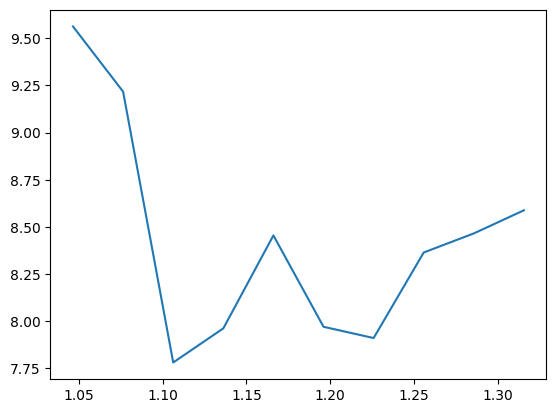

In [39]:
# generate random graph with gilbert solomonoff model, with 10_000 nodes and 0.01 probability
D_ = np.zeros(10)
E_ = np.zeros(10)
N = 300
K = 10
for r in range(K):
    diameters = []
    exp_degrees = []
    for p in tqdm.tqdm(range(35,45)):
        i = p
        p = p/10000
        G = nx.gnp_random_graph(N,p, seed=42)
        # for each couple of nodes, compute the shortest path
        k = 0
        dist = 0


        for node1 in G.nodes():
            for node2 in G.nodes():
                if (node1 != node2):
                    try:
                        dist += nx.shortest_path_length(G, node1, node2)
                        k+=1
                    except:
                        continue
        diameter = dist/k
        exp_degrees.append((N-1)*p)
        
                    
        diameters.append(diameter)
    D_ +=np.array(diameters)
    E_ +=np.array(exp_degrees)

D_ = D_/K
E_ = E_/K

exp_degrees = E_
diameters = D_
# plot expected degree as x and diameter as y
plt.plot(exp_degrees, diameters)
plt.show()


In [31]:
l = np.argmax(diameters)
print(diameters[l])
print(exp_degrees[l])


13.362060332957817
1.497


In [ ]:
np.arg